# Capa de pooling

Además de las capas convolucionales, se suelen añadir capas de pooling para reducir el tamaño de las matrices. Suele haber dos tipos de capas de pooling: `max pooling` y `average pooling`, aunque la más usada es `average pooling`.

Las capas de pooling consisten también en nucleos o kernels que se le aplican a las matrices y al igual que antes se puede añadir padding y se puede modificar el stride. Como el objetivo es reducir el tamaño de las matrices, no se suele añadir padding, y el stride suele ser del mismo tamaño del kernell, es decir, si el kernell es de 3x3, se suele avanzar 3 posiciones

## Max pooling

En el `max pooling` lo que se hace es quedarnos con el máximo valor de todos los elementos de dentro del kernell

<div style="text-align:center;">
  <img src="Imagenes/Animacion_convolucion_amx_pooling.gif" alt="max pooling"> <!-- style="width:425px;height:626px;"> -->
</div>

## Average pooling

En el average pooling lo que se hace es quedarnos con la media de todos los elementos de dentro del kernell

<div style="text-align:center;">
  <img src="Imagenes/Animacion_convolucion_average_pooling.gif" alt="max pooling"> <!-- style="width:425px;height:626px;"> -->
</div>

## Capa pooling en Pytorch

Vamos a hacer pooling de la imagen que hemos estado abriendo hasta ahora

Abrimos la imagen

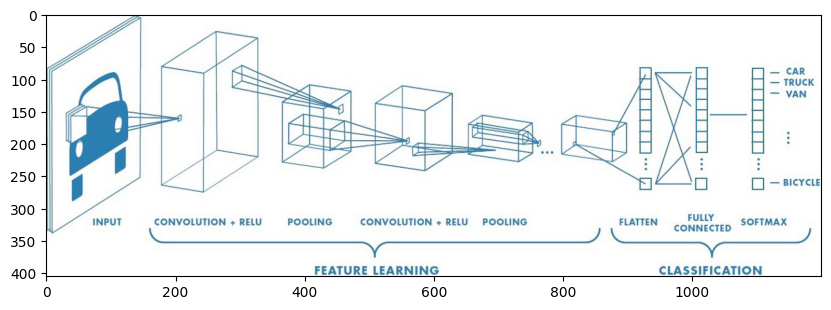

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('Imagenes/CNN.jpeg')
fig = plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

La convertimos a tensor

In [2]:
import numpy as np
import torch

array = np.array(img)
tensor = torch.from_numpy(array)
tensor.shape

torch.Size([405, 1200, 3])

Vemos que el número de canales lo tiene al final, pero Pytorch necesita que esté al inicio, así que lo cambiamos

In [3]:
tensor = tensor.permute(2, 0, 1)
tensor.shape

torch.Size([3, 405, 1200])

Le hacemos `max pooling` y `average pooling`

In [4]:
import torch

max_pooling = torch.nn.MaxPool2d(kernel_size=2, stride=2)
average_pooling = torch.nn.AvgPool2d(kernel_size=2, stride=2)

tensor_max_pooling = max_pooling(tensor.float())
tensor_average_pooling = average_pooling(tensor.float())

tensor_max_pooling.shape, tensor_average_pooling.shape

(torch.Size([3, 202, 600]), torch.Size([3, 202, 600]))

Como vemos la imagen es más pequeña después de hacerle pooling, vamos a representarla para ver cómo queda

Text(0.5, 1.0, 'Average Pooling')

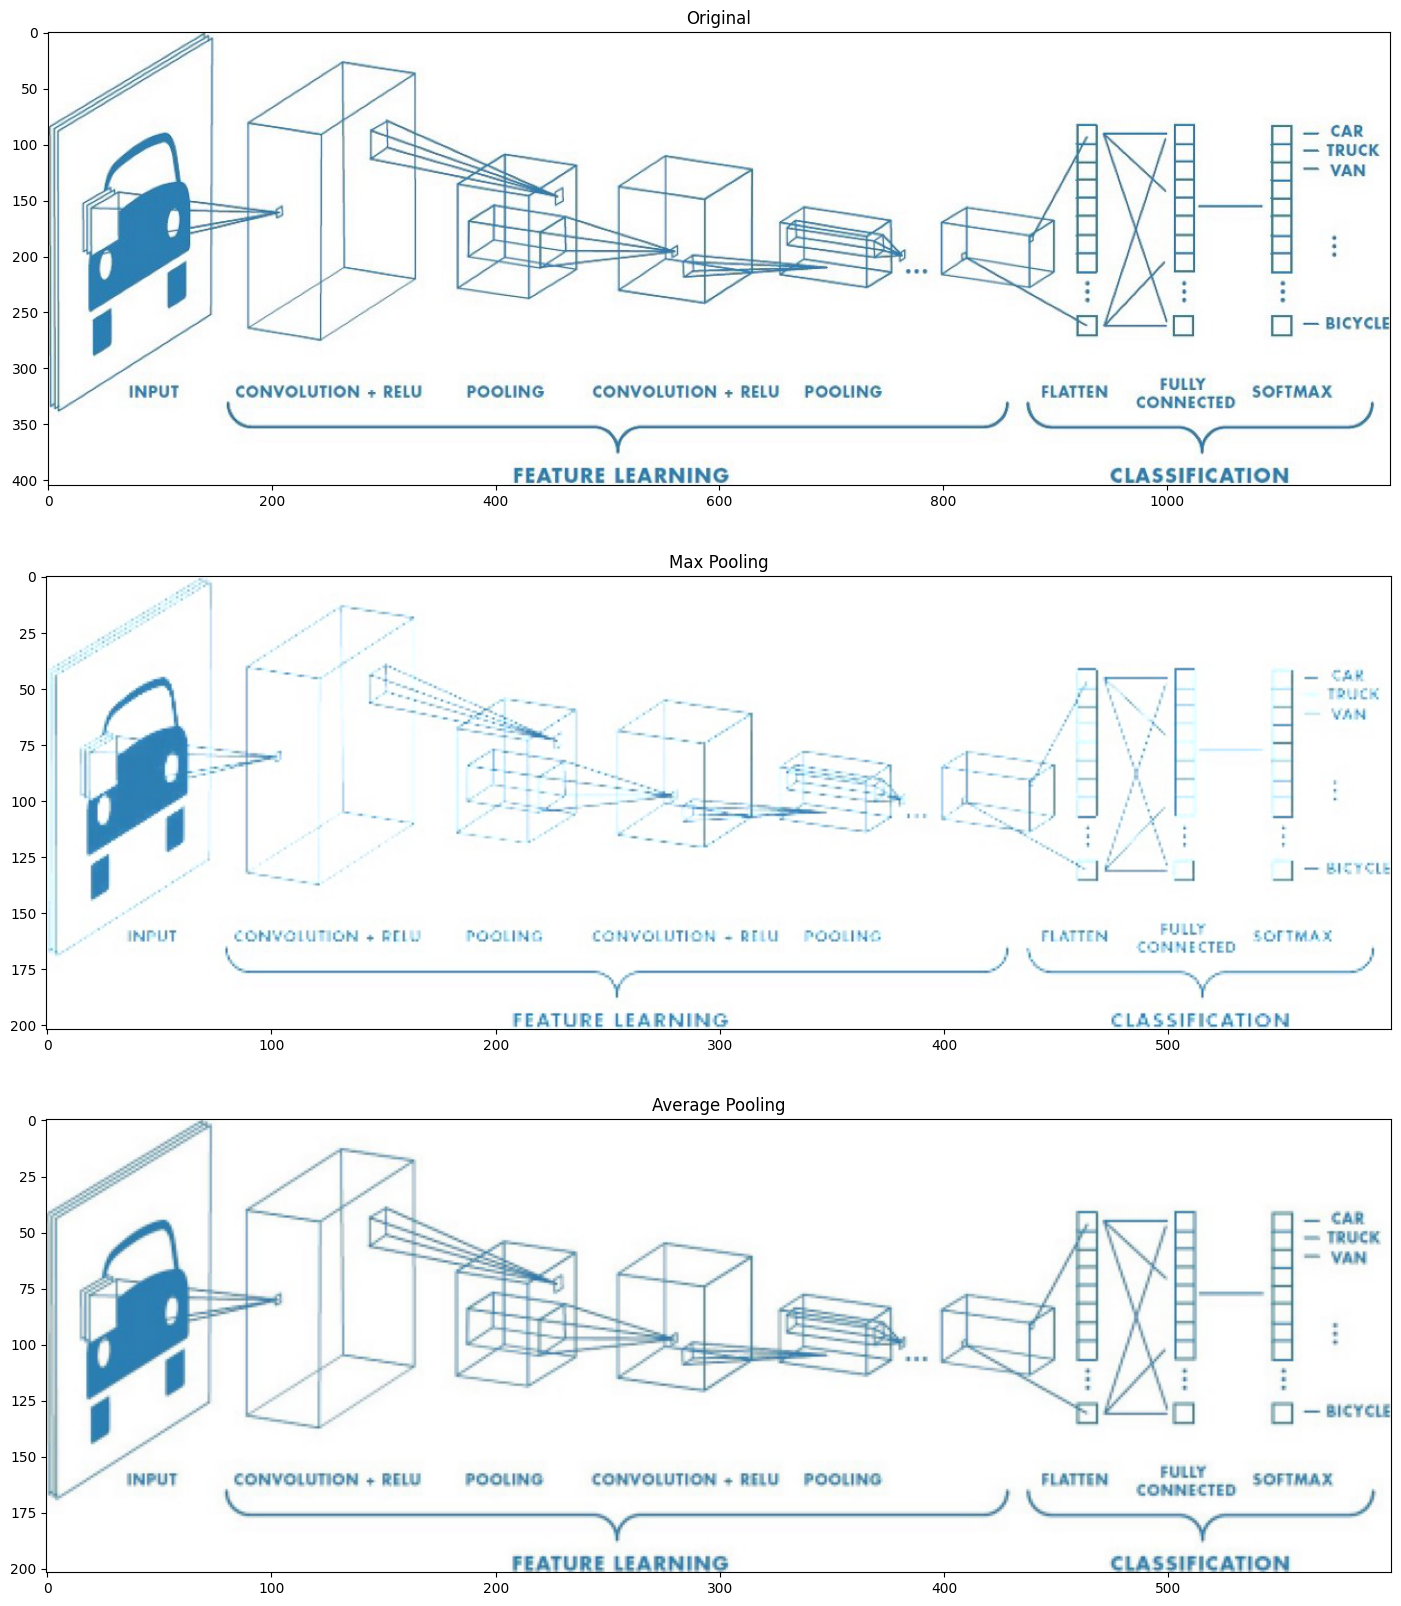

In [5]:
img_max_pooling = tensor_max_pooling.permute(1, 2, 0).numpy()
img_average_pooling = tensor_average_pooling.permute(1, 2, 0).numpy()

# subplot of two images
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(30, 20))
ax0.imshow(img)
ax0.set_title('Original')
ax1.imshow(img_max_pooling.astype(np.uint8))
ax1.set_title('Max Pooling')
ax2.imshow(img_average_pooling.astype(np.uint8))
ax2.set_title('Average Pooling')

Con `average pooling` la imagen resultante parece más borrosa mientras que con `max pooling` parece que se pierde profundidad de bits